In [9]:
library(dplyr)
library(tidyr)
library(igraph)
library(igraph)
library(readr)
library(networkD3)
library(stringr)
library(ggplot2)
library(RColorBrewer)  # Asegúrate de tener este paquete
library(viridis)

In [10]:
# Cargar el archivo CSV (ajusta la ruta y nombre del archivo)
archivo <- "/home/usuario/Escritorio/data.csv"
datos <- read_csv(archivo)

Rows: 3831 Columns: 34
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Authors, Author full names, Author(s) ID, Title, Source title, Vol...
dbl  (4): Year, Page count, Cited by, PubMed ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [51]:
# Ver la columna de afiliaciones
#head(datos$Affiliations)


# Vamos a asumir que los nombres de países están al final de las afiliaciones (esto dependerá del formato del archivo)
# Utilizamos expresiones regulares para extraer los países (puede requerir ajustes según los datos)
datos$paises <- str_extract_all(datos$Affiliations, "\\b[A-Za-z ]+$")

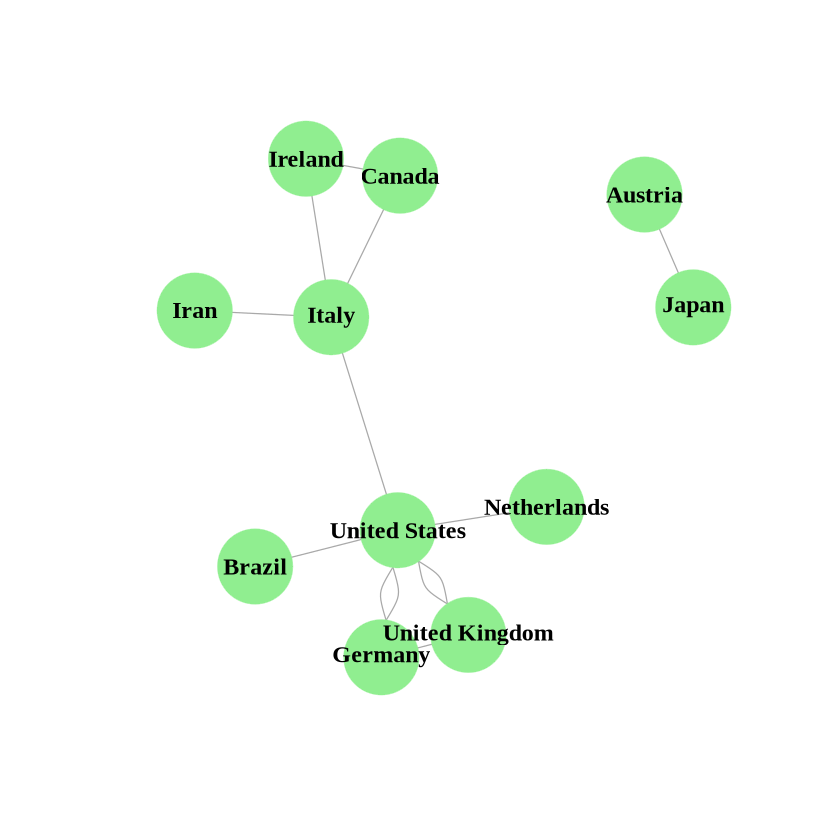

In [53]:
# Crear el grafo
grafo <- graph_from_data_frame(d=edges, directed=FALSE)

# Crear una función para simular el efecto 3D en los nodos
add_shadow <- function(colors, intensity = 0.8) {
  # Hacer que los bordes sean más oscuros para simular un efecto de sombra
  darker_colors <- adjustcolor(colors, intensity)
  return(darker_colors)
}

# Asignar colores de los nodos
vertex_colors <- "lightgreen"
vertex_border_colors <- add_shadow(vertex_colors)

# Definir el layout para mayor separación
layout <- layout_with_fr(grafo)

# Visualizar el grafo con efecto de sombra (simulando 3D)
plot(grafo, 
     layout = layout,                  # Usar el layout definido
     vertex.label = V(grafo)$name, 
     vertex.size = 30,                 # Tamaño de los nodos
     vertex.color = vertex_colors,     # Color de los nodos
     vertex.frame.color = vertex_border_colors, # Bordes más oscuros para simular 3D
     edge.width = 1,
     vertex.label.color = "black",     # Color de las etiquetas
     vertex.label.cex = 1.2,           # Tamaño de las etiquetas
     vertex.label.font = 2             # Negrita
)


In [35]:
# Pasamos a caracteres la lista de países
datos$paises <- paste(datos$paises)

# Suponiendo que tu dataframe se llama 'df'
# Agrupar por 'Year' y 'paises' y contar el número de publicaciones
df_summary <- datos %>%
  group_by(Year, paises) %>%
  summarise(Production = n(), .groups = 'drop')  # Contar el número de publicaciones

# Ver los datos resumidos
print(df_summary)


# A tibble: 519 × 3
    Year paises         Production
   <dbl> <chr>               <int>
 1  2014 Argentina               2
 2  2014 Australia               3
 3  2014 Austria                 1
 4  2014 Belgium                 5
 5  2014 Brazil                  3
 6  2014 Canada                  9
 7  2014 China                  13
 8  2014 Croatia                 1
 9  2014 Czech Republic          1
10  2014 Denmark                 1
# ℹ 509 more rows


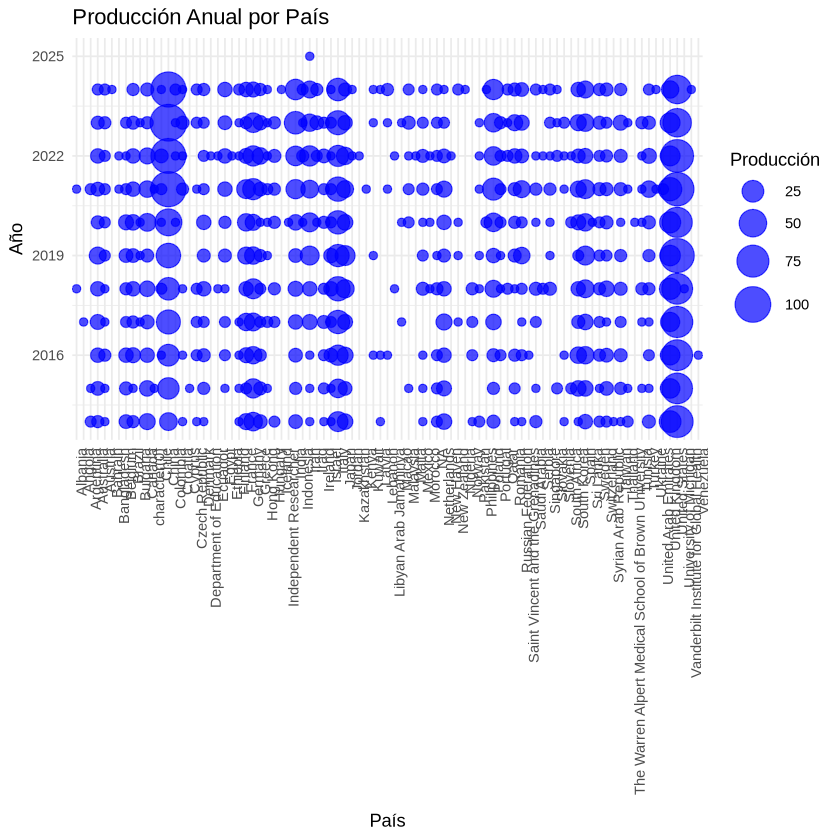

In [38]:
# Crear el gráfico con un color fijo
ggplot(df_summary, aes(x = paises, y = Year, size = Production)) +
  geom_point(alpha = 0.7, color = "blue") +  # Ajusta el color de los puntos
  scale_size(range = c(2, 10), name = "Producción") +  # Ajusta el rango del tamaño de los puntos
  labs(title = "Producción Anual por País",
       x = "País",
       y = "Año") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Ajustar el ángulo del texto del eje x

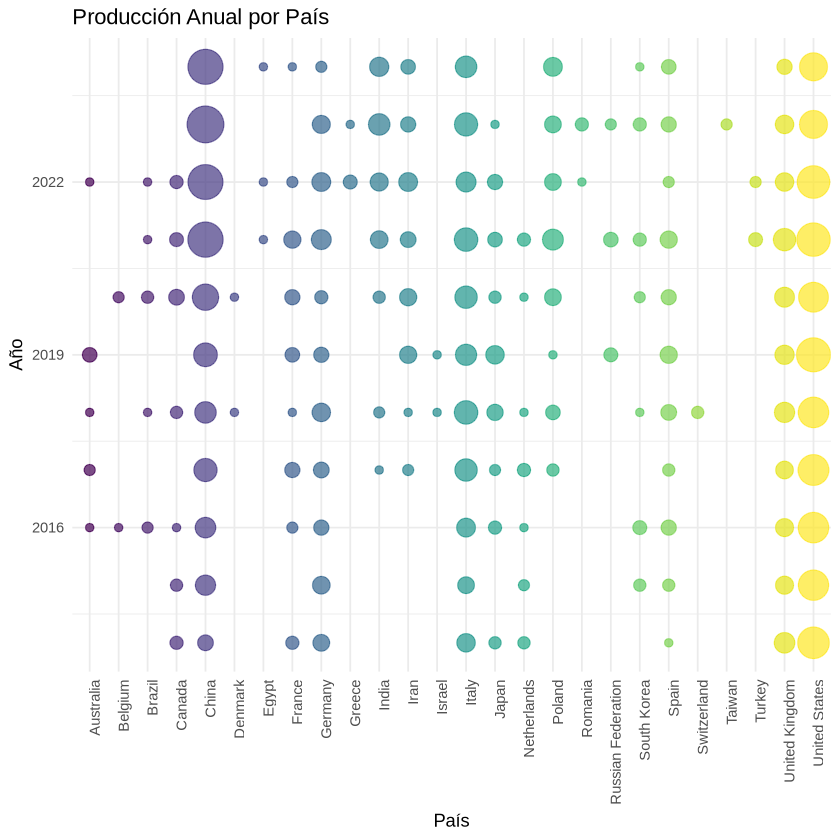

In [48]:
# Crear el gráfico sin leyenda de países
df_summary %>% 
  filter(Production > 5) %>% 
  ggplot(aes(x = paises, y = Year, size = Production, color = paises)) +
  geom_point(alpha = 0.7, show.legend = FALSE) +  # Quitar la leyenda de los países
  scale_size(range = c(2, 10), name = "Producción") + 
  labs(title = "",
       x = "País",
       y = "Año") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  scale_color_viridis_d()  # Usar la paleta viridis para más colores